### [E-11] ÏÑ±Îä•Í∞úÏÑ†Îêú ÌèêÎ†¥ ÏßÑÎã®Í∏∞ ÌîÑÎ°úÏ†ùÌä∏  

1. ÏùòÎ£åÏòÅÏÉÅÏùÑ Ï≤òÎ¶¨ÌïòÎäî CNN Í∏∞Î∞ò Îî•Îü¨Îãù Î™®Îç∏Ïù¥ Ïûò Íµ¨ÌòÑÎêòÏóàÎã§.  
Î™®Îç∏ ÌïôÏäµÏù¥ ÏïàÏ†ïÏ†ÅÏúºÎ°ú ÏàòÎ†¥ÌïòÎäî Í≤ÉÏùÑ ÏãúÍ∞ÅÌôîÎ•º ÌÜµÌï¥ ÌôïÏù∏ÌïòÏòÄÎã§.  

2. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ, Î™®Îç∏Íµ¨ÏÑ± Îì±Ïùò Í≥ºÏ†ïÏùò Îã§ÏñëÌïú Ïã§ÌóòÏù¥ Ï≤¥Í≥ÑÏ†ÅÏúºÎ°ú ÏàòÌñâÎêòÏóàÎã§.  
regularization, augmentation Îì±Ïùò Í∏∞Î≤ïÏùò ÏÇ¨Ïö© Ïó¨Î∂ÄÏóê Îî∞Î•∏ Î™®Îç∏ ÏÑ±Îä• Ï∏°Ï†ïÏù¥    ablation study ÌòïÌÉúÎ°ú Ï≤¥Í≥ÑÏ†ÅÏúºÎ°ú ÏàòÌñâÎêòÏóàÎã§.  

3. Ïã§ÏäµÏΩîÎìúÎ•º Ïûò Í∞úÏÑ†ÌïòÏó¨ ÌèêÎ†¥ Í≤ÄÏ∂ú Ï†ïÌôïÎèÑÍ∞Ä Ï∂îÍ∞ÄÎ°ú Ìñ•ÏÉÅÎêòÏóàÎã§.  
Accuracy Í∏∞Ï§Ä 85%Ïóê ÎèÑÎã¨ÌïòÏòÄÎã§.  

### 1. Ïã§Ìóò ÌôòÍ≤Ω ÏÑ∏ÌåÖ  
Batch size, Epoch Îì±ÏùÑ Î≥ÄÍ≤Ω  

#### 1. ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ import

In [1]:
import os, re
import random, math
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings(action='ignore')

#### 2. ÌïÑÏöîÌïú Î≥ÄÏàò ÏÉùÏÑ±

In [2]:
# Îç∞Ïù¥ÌÑ∞ Î°úÎìúÌï† Îïå Îπ†Î•¥Í≤å Î°úÎìúÌï† Ïàò ÏûàÎèÑÎ°ùÌïòÎäî ÏÑ§Ï†ï Î≥ÄÏàò
AUTOTUNE = tf.data.experimental.AUTOTUNE
# X-RAY Ïù¥ÎØ∏ÏßÄ ÏÇ¨Ïù¥Ï¶à Î≥ÄÏàò
IMAGE_SIZE = [180, 180]

# Îç∞Ïù¥ÌÑ∞ Í≤ΩÎ°ú Î≥ÄÏàò
ROOT_PATH = os.path.join(os.getenv('HOME'), 'aiffel')
TRAIN_PATH = ROOT_PATH + '/chest_xray/data/train/*/*' # *ÏùÄ Î™®Îì† ÎîîÎ†âÌÜ†Î¶¨ÏôÄ ÌååÏùºÏùÑ ÏùòÎØ∏Ìï©ÎãàÎã§.
VAL_PATH = ROOT_PATH + '/chest_xray/data/val/*/*'
TEST_PATH = ROOT_PATH + '/chest_xray/data/test/*/*'

# ÌîÑÎ°úÏ†ùÌä∏Î•º ÏßÑÌñâÌï† Îïå ÏïÑÎûò Îëê Î≥ÄÏàòÎ•º Î≥ÄÍ≤ΩÌï¥Î≥¥ÏÑ∏Ïöî
BATCH_SIZE = 16
EPOCHS = 25

print(ROOT_PATH)

/aiffel/aiffel


#### 3. Îç∞Ïù¥ÌÑ∞ Í∞ÄÏ†∏Ïò§Í∏∞

In [3]:
#
train_filenames = tf.io.gfile.glob(TRAIN_PATH)
test_filenames = tf.io.gfile.glob(TEST_PATH)
val_filenames = tf.io.gfile.glob(VAL_PATH)

print(len(train_filenames))
print(len(test_filenames))
print(len(val_filenames))

#train ÏïàÏóêÎäî 5216Í∞ú, test ÏïàÏóêÎäî 624Í∞ú, val ÏïàÏóêÎäî 16Í∞ú

#val Í∞úÏàòÍ∞Ä ÎÑàÎ¨¥ ÏóÜÏùå  
#trainÏóêÏÑú valÎ°ú Ï°∞Í∏à Îçî Í∞ÄÏ†∏Ïò¥
#trainÍ≥º valÏóê ÏûàÎäî Îç∞Ïù¥ÌÑ∞Î•º Î™®ÏùÄ Îã§ÏùåÏóê train : valÎ•º 80:20ÏúºÎ°ú Î∂ÑÌï†

5216
624
16


#### 3. train, val Î∂ÑÎ¶¨

In [4]:
# train Îç∞Ïù¥ÌÑ∞ÏôÄ validation Îç∞Ïù¥ÌÑ∞Î•º Î™®Îëê filenamesÏóê Îã¥ÏäµÎãàÎã§
filenames = tf.io.gfile.glob(TRAIN_PATH)
filenames.extend(tf.io.gfile.glob(VAL_PATH))

# Î™®ÏïÑÏßÑ filenamesÎ•º 8:2Î°ú ÎÇòÎàïÎãàÎã§
train_size = math.floor(len(filenames)*0.8)
random.seed(8)
random.shuffle(filenames)
train_filenames = filenames[:train_size]
val_filenames = filenames[train_size:]

print(len(train_filenames))
print(len(val_filenames))

4185
1047


#### 4. train Îç∞Ïù¥ÌÑ∞ ÏïàÏóê Ï†ïÏÉÅ Ïù¥ÎØ∏ÏßÄ ÏàòÏôÄ ÌèêÎ†¥ Ïù¥ÎØ∏ÏßÄ Ïàò ÌôïÏù∏

In [5]:
#Ï†ïÏÉÅ, ÌèêÎ†¥ Ïù¥ÎØ∏ÏßÄ Ïàò ÌôïÏù∏Ìï¥Î≥¥Í∏∞ ÏúÑÌï¥ ÌååÏùº Í≤ΩÎ°ú ÌôïÏù∏  
print(f'Normal image path\n{filenames[0]}')
print(f'Pneumonia image path\n{filenames[2000]}')   

Normal image path
/aiffel/aiffel/chest_xray/data/train/NORMAL/IM-0447-0001.jpeg
Pneumonia image path
/aiffel/aiffel/chest_xray/data/train/PNEUMONIA/person614_bacteria_2483.jpeg


In [6]:
#Ï†ïÏÉÅ, Ï≥¨Î†¥ Ïù¥ÎØ∏ÏßÄ Ïàò ÏÑ∏Í∏∞
COUNT_NORMAL = len([filename for filename in train_filenames if "NORMAL" in filename])
print(f"Normal images count in training set: {COUNT_NORMAL}")


COUNT_PNEUMONIA = len([filename for filename in train_filenames if "PNEUMONIA" in filename])
print(f"Pneumonia images count in training set: {COUNT_PNEUMONIA}")

#ÌèêÎ†¥ Ïù¥ÎØ∏ÏßÄÍ∞Ä Ï†ïÏÉÅÎ≥¥Îã§ 3Î∞∞ Îçî ÎßéÏù¥ ÏûàÎäî Í≤É ÌôïÏù∏Îê®  
#Îç∞Ïù¥ÌÑ∞ Î∂àÍ∑†ÌòïÏù¥ ÏûàÎã§Í≥† ÌåêÎã®Îê® 
#CNN Î™®Îç∏ÏùÄ ÌÅ¥ÎûòÏä§Î≥Ñ Î∞∏Îü∞Ïä§Í∞Ä Ï¢ãÏùÑ ÏàòÎ°ù ÌïôÏäµ ÏûòÌï® „Öé„Öé

Normal images count in training set: 1072
Pneumonia images count in training set: 3113


#### 5. tf.data Ïù∏Ïä§ÌÑ¥Ïä§ ÏÉùÏÑ±   
tf.dataÎäî tensorflowÏóêÏÑú ÌïôÏäµÏãúÌÇ¨ Îïå, mini-batchÎ°ú ÏûëÏóÖÌï† Ïàò ÏûàÎèÑÎ°ù Ìï¥Ï§å    
ÎØ∏ÎãàÎ∞∞Ïπò Ïôú Ïì∞ÎäîÏßÄ ÎßÅÌÅ¨ : https://dambaekday.tistory.com/1  

In [7]:
train_list_ds = tf.data.Dataset.from_tensor_slices(train_filenames)
val_list_ds = tf.data.Dataset.from_tensor_slices(val_filenames)

#### 6. ÎùºÎ≤®(y) Îç∞Ïù¥ÌÑ∞ ÎßåÎì§Ïñ¥Ï£ºÎäî Ìï®Ïàò ÏÉùÏÑ±

In [8]:
#train, val Îç∞Ïù¥ÌÑ∞ Í∞úÏàò ÌôïÏù∏
TRAIN_IMG_COUNT = tf.data.experimental.cardinality(train_list_ds).numpy()
print(f"Training images count: {TRAIN_IMG_COUNT}")

VAL_IMG_COUNT = tf.data.experimental.cardinality(val_list_ds).numpy()
print(f"Validating images count: {VAL_IMG_COUNT}")

# ÎùºÎ≤® Îç∞Ïù¥ÌÑ∞ Îî∞Î°ú ÏóÜÏù¥ Í∑∏ÎÉ• Î™®Îì† Ïª¨Îüº Îç∞Ïù¥ÌÑ∞Î°ú Î¨∂Ïó¨ ÏûàÏùå
# ÌèêÎ†¥Ïù¥Î©¥=ÏñëÏÑ±= T, ÎÖ∏ÎßêÏù¥Î©¥=ÏùåÏÑ± =F

Training images count: 4185
Validating images count: 1047


In [9]:
# ÌååÏùº Í≤ΩÎ°úÏùò ÎÅùÏóêÏÑú ÎëêÎ≤àÏß∏ Î∂ÄÎ∂ÑÏùÑ ÌôïÏù∏ÌïòÎ©¥ ÏñëÏÑ±Í≥º ÏùåÏÑ±ÏùÑ Íµ¨Î∂ÑÌï† Ïàò ÏûàÏäµÎãàÎã§
def get_label(file_path):
    parts = tf.strings.split(file_path, os.path.sep)
    return parts[-2] == "PNEUMONIA"   

# ÌèêÎ†¥Ïù¥Î©¥ ÏñëÏÑ±(True), ÎÖ∏ÎßêÏù¥Î©¥ ÏùåÏÑ±(False)

#### 7. Ïù¥ÎØ∏ÏßÄ Î¶¨ÏÇ¨Ïù¥Ï¶à  
Ïù¥ÎØ∏ÏßÄ Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïù¥Ï¶à ÌòÑÏã§Ï†ÅÏúºÎ°ú Ï†úÍ∞ÅÍ∞ÅÏùºÍ≤É  
Ïù¥ÎØ∏ÏßÄ ÏÇ¨Ïù¥Ï¶à ÌÜµÏùº + Ìö®Ïú®Ï†ÅÏù∏ GPU ÏÇ¨Ïö© ÏúÑÌï¥ -> Ïù¥ÎØ∏ÏßÄ ÏÇ¨Ïù¥Ï¶à Ï§ÑÏûÑ  

- decode_img Ìï®Ïàò ÏÉùÏÑ±  
- process_path Ìï®Ïàò ÏÉùÏÑ±  
  : process_path Ìï®ÏàòÏóêÏÑú decode_img Ìï®ÏàòÎ•º Ïù¥Ïö©Ìï¥ÏÑú Ïù¥ÎØ∏ÏßÄÏùò Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖÏùÑ floatÏúºÎ°ú Î∞îÍæ∏Í≥† ÏÇ¨Ïù¥Ï¶àÎ•º Î≥ÄÍ≤Ω 
- get_label:  ÎùºÎ≤® Í∞íÏùÑ Í∞ÄÏ†∏Ïò¥  

In [10]:
# Ïù¥ÎØ∏ÏßÄÎ•º ÏïåÎßûÏùÄ ÌòïÏãùÏúºÎ°ú Î∞îÍøâÎãàÎã§.
#X-RAY Ïù¥ÎØ∏ÏßÄ ÏÇ¨Ïù¥Ï¶à Î≥ÄÏàò : IMAGE_SIZE = [180, 180]
def decode_img(img):
    img = tf.image.decode_jpeg(img, channels=3) # Ïù¥ÎØ∏ÏßÄÎ•º uint8 tensorÎ°ú ÏàòÏ†ï
    img = tf.image.convert_image_dtype(img, tf.float32) # float32 ÌÉÄÏûÖÏúºÎ°ú ÏàòÏ†ï
    img = tf.image.resize(img, IMAGE_SIZE) # Ïù¥ÎØ∏ÏßÄ ÏÇ¨Ïù¥Ï¶àÎ•º IMAGE_SIZEÎ°ú ÏàòÏ†ï
    return img

# Ïù¥ÎØ∏ÏßÄ ÌååÏùºÏùò Í≤ΩÎ°úÎ•º ÏûÖÎ†•ÌïòÎ©¥ Ïù¥ÎØ∏ÏßÄÏôÄ ÎùºÎ≤®ÏùÑ ÏùΩÏñ¥ÏòµÎãàÎã§.
def process_path(file_path):
    label = get_label(file_path) # ÎùºÎ≤® Í≤ÄÏ∂ú
    img = tf.io.read_file(file_path) # Ïù¥ÎØ∏ÏßÄ ÏùΩÍ∏∞
    img = decode_img(img) # Ïù¥ÎØ∏ÏßÄÎ•º ÏïåÎßûÏùÄ ÌòïÏãùÏúºÎ°ú ÏàòÏ†ï
    return img, label

num_parallel_calls ÌååÎùºÎØ∏ÌÑ∞Ïóê ÏúÑÏóêÏÑú Ìï†ÎãπÌïú  
AUTOTUNEÎ≥ÄÏàò Ïù¥Ïö©ÌïòÎ©¥ Îπ†Î•∏ Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨ Í∞ÄÎä•  

In [11]:
# Îç∞Ïù¥ÌÑ∞ Î°úÎìúÌï† Îïå Îπ†Î•¥Í≤å Î°úÎìúÌï† Ïàò ÏûàÎèÑÎ°ùÌïòÎäî ÏÑ§Ï†ï Î≥ÄÏàò
#AUTOTUNE = tf.data.experimental.AUTOTUNE

#train_ds : Îπ†Î•¥Í≤å Îç∞Ïù¥ÌÑ∞ Î°úÎìúÌï¥ÏôÄÏÑú, Ïù¥ÎØ∏ÏßÄ Î¶¨ÏÇ¨Ïù¥Ï¶àÎ•º Î™®Îì† train Ïù¥ÎØ∏ÏßÄÏóê Ï†ÅÏö©. Ïù¥ Ïù¥ÎØ∏ÏßÄÎì§ÏùÑ Îã§ Í∞ÄÏ†∏Ïò§Îäî Î≥ÄÏàò
train_ds = train_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)
val_ds = val_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)

##### 8. Î¶¨ÏÇ¨Ïù¥Ï¶à, ÎùºÎ≤® ÌôïÏù∏Ìï¥Î≥¥Í∏∞

In [12]:
#take() : Ìñâ,Ïó¥  Ï∂îÏ∂ú. iloc Î≥¥Îã§ Ï¢Ä Îçî Îπ†Î•∏ ÏÑ±Îä• Í∏∞ÎåÄ
#https://kongdols-room.tistory.com/181
for image, label in train_ds.take(1):
    print("Image shape: ", image.numpy().shape)
    print("Label: ", label.numpy())

Image shape:  (180, 180, 3)
Label:  False


#### 9.  test Îç∞Ïù¥ÌÑ∞ÏÖãÎèÑ Ïù∏Ïä§ÌÑ¥Ïä§ ÏÉùÏÑ± ~Î¶¨ÏÇ¨Ïù¥Ï¶à

In [13]:
#ÌÖåÏä§Ìä∏ Ïù∏Ïä§ÌÑ¥Ìä∏ ÏÉùÏÑ±
test_list_ds = tf.data.Dataset.list_files(TEST_PATH)
#ÌÖåÏä§Ìä∏ ÎùºÎ≤® Îç∞Ïù¥ÌÑ∞ ÎßåÎì§Ïñ¥Ï£ºÍ∏∞
TEST_IMAGE_COUNT = tf.data.experimental.cardinality(test_list_ds).numpy()
#Îπ†Î•¥Í≤å Ïù¥ÎØ∏ÏßÄ Î¶¨ÏÇ¨Ïù¥Ï¶à
test_ds = test_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)
#ÏúÑÏóêÏÑú Î∞∞ÏπòÏÇ¨Ïù¥Ï¶à 16ÏúºÎ°ú ÏßÄÏ†ïÌï®  
test_ds = test_ds.batch(BATCH_SIZE)

#ÌÖåÏä§Ìä∏ ÎùºÎ≤® Îç∞Ïù¥ÌÑ∞ Í∞úÏàò = 624
print(TEST_IMAGE_COUNT)

624


#### 10 . ÌååÏù¥ÌîÑÎùºÏù∏ ÏÇ¨Ïö© Ìï®Ïàò ÏÉùÏÑ±

* ÌååÏù¥ÌîÑÎùºÏù∏  
Ìïú Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨ Îã®Í≥ÑÏùò Ï∂úÎ†•Ïù¥ Îã§Ïùå Îã®Í≥ÑÏùò ÏûÖÎ†•ÏúºÎ°ú Ïù¥Ïñ¥ÏßÄÎäî ÌòïÌÉúÎ°ú Ïó∞Í≤∞Îêú Íµ¨Ï°∞  
Ïù¥Î†áÍ≤å Ïó∞Í≤∞Îêú Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨ Îã®Í≥ÑÎäî Ìïú Ïó¨Îü¨ Îã®Í≥ÑÍ∞Ä ÏÑúÎ°ú ÎèôÏãúÏóê,  
ÎòêÎäî Î≥ëÎ†¨Ï†ÅÏúºÎ°ú ÏàòÌñâÎê† Ïàò ÏûàÏñ¥ Ìö®Ïú®Ï†Å  
Í∞Å Îã®Í≥Ñ ÏÇ¨Ïù¥Ïùò ÏûÖÏ∂úÎ†•ÏùÑ Ï§ëÍ≥ÑÌïòÍ∏∞ ÏúÑÌï¥ Î≤ÑÌçºÍ∞Ä ÏÇ¨Ïö©Îê† Ïàò ÏûàÏùå  


* TensorflowÏóêÏÑúÎäî  
  tf.data ÌååÏù¥ÌîÑÎùºÏù∏ÏùÑ ÏÇ¨Ïö©Ìï¥ÏÑú  
  ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Î•º Ìö®Ïú®Ï†ÅÏúºÎ°ú ÏÇ¨Ïö©Ìï† Ïàò ÏûàÎèÑÎ°ù Ìï¥Ï§å 
  

In [14]:
def prepare_for_training_simple(ds, shuffle_buffer_size=1000):

    ds = ds.shuffle(buffer_size=shuffle_buffer_size)

    ds = ds.repeat()

    ds = ds.batch(BATCH_SIZE)

    ds = ds.prefetch(buffer_size=AUTOTUNE)

    return ds

train_ds_simple = prepare_for_training_simple(train_ds)
val_ds_simple = prepare_for_training_simple(val_ds)

#### 11. ÌååÏù¥ÌîÑÎùºÏù∏ + augmentation ÏÇ¨Ïö© Ìï®Ïàò ÏÉùÏÑ±
* ÏùòÎ£å ÏòÅÏÉÅ Ïù¥ÎØ∏ÏßÄÏùò ÌäπÏÑ±ÏÉÅ Îç∞Ïù¥ÌÑ∞Îäî Ïñ∏Ï†úÎÇò Ï∂©Î∂ÑÌïòÏßÄ ÏïäÏùå  
  -> augmentation Í∏∞Î≤ï ÎèÑÏûÖ  
  -> Ïú°ÏïàÏúºÎ°úÎèÑ Íµ¨Î∂ÑÌïòÍ∏∞ Ïñ¥Î†§Ïö¥ ÎØ∏Î¨òÌïú Ï∞®Ïù¥Ïóê  
     ÎçîÌï¥ÏßÑ ÎÖ∏Ïù¥Ï¶à Îì± Î∂ÄÏàòÌö®Í≥ºÍ∞Ä Ïò§ÌûàÎ†§ Î∞©Ìï¥Î•º Ï§Ñ ÏàòÎèÑ ÏûàÏùå  
   -> Í∑∏ÎûòÏÑú Ïã†Ï§ëÌûà ÎèÑÏûÖÌï¥ÏïºÌï®   
   
ÎûúÎç§ÌïòÍ≤å Ïù¥ÎØ∏ÏßÄ Ï¢åÏö∞Î∞òÏ†Ñ ÏãúÏºúÏ§òÏÑú Îç∞Ïù¥ÌÑ∞ ÎßéÍ≤å Ìï¥Ï§å  

In [15]:
def augment(image,label):
    image = tf.image.random_flip_left_right(image)  # ÎûúÎç§ÌïòÍ≤å Ï¢åÏö∞Î•º Î∞òÏ†ÑÌï©ÎãàÎã§.
    return image,label

In [16]:
#prepare_for_training() : tf.data ÌååÏù¥ÌîÑÎùºÏù∏ ÏÇ¨Ïö©Ìï¥ÏÑú Ï†ïÏùò

#shuffle() : Í≥†Ï†ï ÌÅ¨Í∏∞ Î≤ÑÌçº Ïú†ÏßÄ, Ìï¥Îãπ Î≤ÑÌçºÏóêÏÑú Î¨¥ÏûëÏúÑÎ°ú Í∑†ÏùºÌïòÍ≤å Îã§Ïùå ÏöîÏÜå ÏÑ†ÌÉù  

#repeat() : ÏóêÌè¨ÌÅ¨ ÏßÑÌñâÌïòÎ©¥ÏÑú Ïó¨Îü¨Î≤à Îç∞Ïù¥ÌÑ∞ ÏÖã Î∂àÎü¨Ïò§ÎäîÎç∞, 
#Ïó¨Îü¨Î≤à Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÏÇ¨Ïö©Ïùò Í≤ΩÏö∞ Ïó¨Îü¨Î≤à Îç∞Ïù¥ÌÑ∞ ÏÖãÏùÑ ÏÇ¨Ïö©

#batch():  BATCH_SIZEÏóêÏÑú Ï†ïÌïú ÎßåÌÅºÏùò Î∞∞ÏπòÎ°ú Ï£ºÏñ¥Ïßê

#prefetch() : ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ ÎÇòÎà†ÏÑú ÏùΩÏñ¥Ïò¥ 
#(gpuÏóêÏÑú ÌïôÏäµÌïòÎäî ÎèôÏïà ÎëêÎ≤àÏß∏ Îç∞Ïù¥ÌÑ∞ cpuÏóêÏÑú Ï§ÄÎπÑ Í∞ÄÎä•)

def prepare_for_training(ds, shuffle_buffer_size=1000):
    # augment Ï†ÅÏö© Î∂ÄÎ∂ÑÏù¥ Î∞∞ÏπòÏ≤òÎ¶¨ Ìï®ÏàòÏóê Ï∂îÍ∞ÄÎêòÏóàÏäµÎãàÎã§.
    ds = ds.map(
            augment,       # augment Ìï®Ïàò Ï†ÅÏö©
            num_parallel_calls=2
        )
    ds = ds.shuffle(buffer_size=shuffle_buffer_size)
    ds = ds.repeat()
    ds = ds.batch(BATCH_SIZE)
    ds = ds.prefetch(buffer_size=AUTOTUNE)

    return ds

train_ds_ag = prepare_for_training(train_ds)
val_ds_ag = prepare_for_training(val_ds)

### 3. Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî  

trainÏóê ÏûàÎäî batch Ï§ë Ï≤´ Î≤àÏß∏ Î∞∞ÏπòÎ•º Ï∂îÏ∂ú  
Ï∂îÏ∂úÎêú Î∞∞ÏπòÎ•º imageÏôÄ label Îç∞Ïù¥ÌÑ∞ ÏÖãÏúºÎ°ú ÎÇòÎà¥ÎçòÍ±∏ Í∞Å Ïù∏ÏûêÎ°ú Í∞ÄÏ†∏Ïò¥  

##### 1) baseline_simple ÏãúÍ∞ÅÌôî

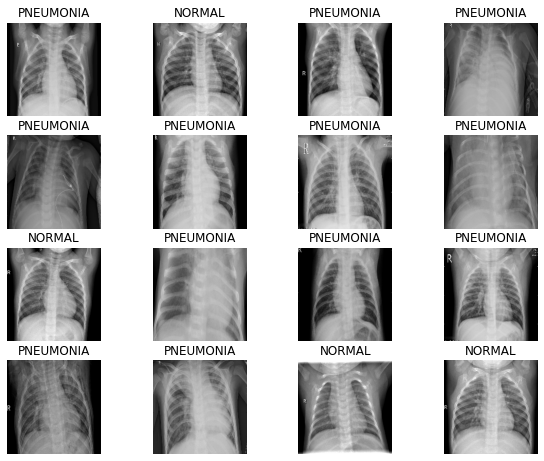

In [17]:
# Ïù¥ÎØ∏ÏßÄ Î∞∞ÏπòÎ•º ÏûÖÎ†•ÌïòÎ©¥ Ïó¨Îü¨Ïû•Ïùò Ïù¥ÎØ∏ÏßÄÎ•º Î≥¥Ïó¨Ï§çÎãàÎã§.
def show_batch_simple(image_batch_simple, label_batch_simple):
    plt.figure(figsize=(10,10))
    for n in range(BATCH_SIZE):
        ax = plt.subplot(5,math.ceil(BATCH_SIZE/5),n+1)
        plt.imshow(image_batch_simple[n])
        if label_batch_simple[n]:
            plt.title("PNEUMONIA")
        else:
            plt.title("NORMAL")
        plt.axis("off")


image_batch_simple, label_batch_simple = next(iter(train_ds_simple))
show_batch_simple(image_batch_simple.numpy(), label_batch_simple.numpy())

##### 2)  baseline + augumentation ÏãúÍ∞ÅÌôî

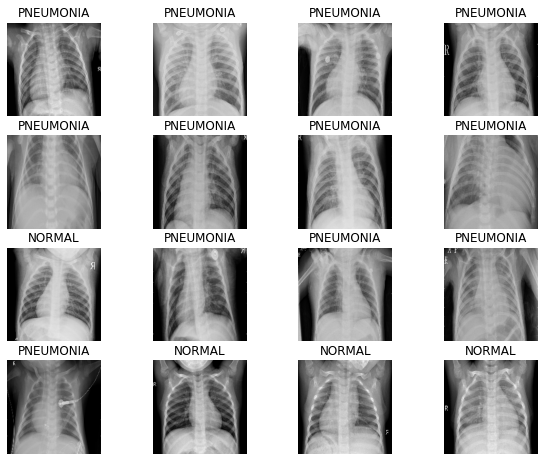

In [18]:
# Ïù¥ÎØ∏ÏßÄ Î∞∞ÏπòÎ•º ÏûÖÎ†•ÌïòÎ©¥ Ïó¨Îü¨Ïû•Ïùò Ïù¥ÎØ∏ÏßÄÎ•º Î≥¥Ïó¨Ï§çÎãàÎã§.
def show_batch_ag(image_batch_ag, label_batch_ag):
    plt.figure(figsize=(10,10))
    for n in range(BATCH_SIZE):
        ax = plt.subplot(5,math.ceil(BATCH_SIZE/5),n+1)
        plt.imshow(image_batch_ag[n])
        if label_batch_ag[n]:
            plt.title("PNEUMONIA")
        else:
            plt.title("NORMAL")
        plt.axis("off")


image_batch_ag, label_batch_ag = next(iter(train_ds_ag))
show_batch_ag(image_batch_ag.numpy(), label_batch_ag.numpy())

### 4. CNN Î™®Îç∏ÎßÅ
CNN ÏöîÏïΩ ÎÖºÎ¨∏ : http://taewan.kim/post/cnn/

#### 1. conv block ÏÉùÏÑ±

In [19]:
def conv_block(filters):
    block = tf.keras.Sequential([
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(), #BN : Í∑∏ÎûòÎîîÏñ∏Ìä∏ Î∞∞ÎãàÏã±/ ÏùµÏä§ÌîåÎ°úÎî© Ìï¥Í≤∞
        tf.keras.layers.MaxPool2D()
    ])
    
    return block

##### 2. Dense Block () = Fully connected ÏÉùÏÑ±  (dropout+ BN Î™®Îëê Ìè¨Ìï®)

In [20]:
def dense_block(units, dropout_rate):
    block = tf.keras.Sequential([
        tf.keras.layers.Dense(units, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(dropout_rate)
    ])
    
    return block

#Batch NormalizationÍ≥º DropoutÏù¥ÎùºÎäî Îëê Í∞ÄÏßÄ regularization Í∏∞Î≤ïÏù¥ ÎèôÏãúÏóê ÏÇ¨Ïö©
#ÏùºÎ∞òÏ†ÅÏúºÎ°ú ÎèôÏãúÏóê ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÏßÄÎßå
#ÏòàÏô∏Ï†ÅÏúºÎ°ú Í∞ôÏù¥ Ïì∞Í∏∞ÎèÑ Ìï®
#ÎëêÍ∞ÄÏßÄ Ìï®Íªò Ïì∞ÎäîÍ≤å Î™®Îç∏ ÏÑ±Îä• Ìñ•ÏÉÅÏóê Ï¢ãÏùÄÏßÄ ÏïÑÎãåÏßÄ Ìù•ÎØ∏Î°≠Í≤å Î≥º Î∂ÄÎ∂Ñ

#### 3.  Dense Block_dp () ÏÉùÏÑ±_ BN Ï†úÏô∏. DropoutÎßå Ìè¨Ìï®

In [21]:
def dense_block_dp(units, dropout_rate):
    block = tf.keras.Sequential([
        tf.keras.layers.Dense(units, activation='relu'),
        tf.keras.layers.Dropout(dropout_rate)
    ])
    
    return block

#### 4. Dense Block_bn () ÏÉùÏÑ±_ BNÎßå Ìè¨Ìï®. DropoutÏùÄ Ï†úÏô∏

In [22]:
def dense_block_bn(units):
    block = tf.keras.Sequential([
        tf.keras.layers.Dense(units, activation='relu'),
        tf.keras.layers.BatchNormalization(),
    ])
    
    return block

#### 3. ÏµúÏ¢Ö Î™®Îç∏ ÏÉùÏÑ±

##### 1) baseline_simple Î™®Îç∏ ÏÉùÏÑ±

In [23]:
def build_model_bs():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
        
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(),
        
        conv_block(32),
        conv_block(64),
        
        conv_block(128),
        tf.keras.layers.Dropout(0.2),
        
        conv_block(256),
        tf.keras.layers.Dropout(0.2),
        
        tf.keras.layers.Flatten(),
        dense_block(512, 0.7),
        dense_block(128, 0.5),
        dense_block(64, 0.3),
        
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    return model

##### 2) baseline + augumentation Î™®Îç∏ ÏÉùÏÑ±

In [24]:
def build_model_ba():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
        
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(),
        
        conv_block(32),
        conv_block(64),
        
        conv_block(128),
        tf.keras.layers.Dropout(0.2),
        
        conv_block(256),
        tf.keras.layers.Dropout(0.2),
        
        tf.keras.layers.Flatten(),
        dense_block(512, 0.7),
        dense_block(128, 0.5),
        dense_block(64, 0.3),
        
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    return model

##### 3) baseline + augumentation + dropout Îßå Ï†ÅÏö©Ìïú Dense_block_dp() Î™®Îç∏ ÏÉùÏÑ±

In [25]:
def build_model_dp():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
        
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(),
        
        conv_block(32),
        conv_block(64),
        
        conv_block(128),
        tf.keras.layers.Dropout(0.2),
        
        conv_block(256),
        tf.keras.layers.Dropout(0.2),
        
        tf.keras.layers.Flatten(),
        dense_block_dp(512, 0.7),
        dense_block_dp(128, 0.5),
        dense_block_dp(64, 0.3),
        
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    return model

##### 4) baseline + augumentation + BN Îßå Ï†ÅÏö©Ìïú  Dense Block_bn () ÏÉùÏÑ±

In [26]:
def build_model_bn():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
        
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(),
        
        conv_block(32),
        conv_block(64),
        
        conv_block(128),
        tf.keras.layers.Dropout(0.2),
        
        conv_block(256),
        tf.keras.layers.Dropout(0.2),
        
        tf.keras.layers.Flatten(),
        dense_block_bn(512),
        dense_block_bn(128),
        dense_block_bn(64),
        
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    return model

##### 5) regulization.L2 Î™®Îç∏ ÏÉùÏÑ±

In [27]:
def build_model_r():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
        
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(),
        
        conv_block(32),
        conv_block(64),
        
        conv_block(128),
        tf.keras.layers.Dropout(0.2),
        
        conv_block(256),
        tf.keras.layers.Dropout(0.2),
        
        tf.keras.layers.Flatten(),
        dense_block(512, 0.7),
        dense_block(128, 0.5),
        dense_block(64, 0.3),
        
        tf.keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(0.01))
    ])
    
    return model

### 5. Îç∞Ïù¥ÌÑ∞ imbalance Ï≤òÎ¶¨  

* ÎÖ∏Î©ÄÍ≥º ÌèêÎ†¥Ï§ëÏóê ÌèêÎ†¥ Îç∞Ïù¥ÌÑ∞Í∞Ä ÎÑàÎ¨¥ ÎßéÏù¥ ÏûàÏóàÏùå = imbalance ÌñàÏùå  

* Ìï¥Í≤∞Î∞©Î≤ï =  Weight balancing ÌÖåÌÅ¨Îãâ  
  - training setÏùò Í∞Å Îç∞Ïù¥ÌÑ∞ÏóêÏÑú lossÎ•º Í≥ÑÏÇ∞Ìï† Îïå ÌäπÏ†ï ÌÅ¥ÎûòÏä§Ïùò Îç∞Ïù¥ÌÑ∞Ïóê Îçî ÌÅ∞ loss Í∞íÏùÑ Í∞ñÎèÑÎ°ù Í∞ÄÏ§ëÏπòÎ•º Î∂ÄÏó¨ÌïòÎäî Î∞©Î≤ï
  - KerasÎäî model.fit()ÏùÑ Ìò∏Ï∂úÌï† Îïå ÌååÎùºÎØ∏ÌÑ∞Î°ú ÎÑòÍ∏∞Îäî class_weight Ïóê Ïù¥Îü¨Ìïú ÌÅ¥ÎûòÏä§Î≥Ñ Í∞ÄÏ§ëÏπòÎ•º ÏÑ∏ÌåÖÌï† Ïàò ÏûàÎèÑÎ°ù ÏßÄÏõêÌïòÍ≥† ÏûàÏäµÎãàÎã§.  
  - ÏÉÅÏÑ∏ ÎÇ¥Ïö© : https://3months.tistory.com/414

In [28]:
#weight_for_0ÏùÄ 'Normal' Ïù¥ÎØ∏ÏßÄÏóê ÏÇ¨Ïö©Ìï† weight
#weight_for_1ÏùÄ 'Pneumonia' Ïù¥ÎØ∏ÏßÄÏóê ÏÇ¨Ïö©Ìï† weight
#weightÎì§ÏùÄ 'Normal'Í≥º 'Pneumonia' Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Í±¥ÏàòÏóê Î∞òÎπÑÎ°ÄÌïòÎèÑÎ°ù ÏÑ§Ï†ï

#Îü¨Îãù Î†àÏù¥Ìä∏ ÏÑ§Ï†ï (Îç∞Ïù¥ÌÑ∞ Í∞úÏàò Îã§Î•¥ÎãàÍπå Îü¨Îãù Î†àÏù¥Ìä∏Î•º Îã§Î•¥Í≤å ÏÑ§Ï†ï)
#ÏßÄÍ∏à ÏïÑÎûòÏóêÏÑúÎäî lr =2.0 ÏúºÎ°ú ÎëêÍ≥† ÏûàÏùå  
weight_for_0 = (1 / COUNT_NORMAL)*(TRAIN_IMG_COUNT)/2.0 
weight_for_1 = (1 / COUNT_PNEUMONIA)*(TRAIN_IMG_COUNT)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for NORMAL: {:.2f}'.format(weight_for_0))
print('Weight for PNEUMONIA: {:.2f}'.format(weight_for_1))

Weight for NORMAL: 1.95
Weight for PNEUMONIA: 0.67


### 6. Î™®Îç∏ ÌõàÎ†®
Ïù¥ÎØ∏ÏßÄ ÌõàÎ†®ÏùÄ GPUÎ•º ÏÇ¨Ïö©Ìï† Í≤ÉÏù¥Í∏∞ ÎïåÎ¨∏Ïóê Î®ºÏ†Ä GPUÎ•º ÏÑ†ÌÉù  
Î™®Îç∏ÏùÄ ÏúÑÏóêÏÑú ÎßåÎì§ÏóàÎçò Î™®Îç∏ Ìï®ÏàòÏù∏ build_model()ÏùÑ modelÏóê ÏÑ†Ïñ∏ 

#### Ï°∞Í∏∞Ï¢ÖÎ£å= EarlyStopping ÏÑ§Ï†ïÌïòÍ∏∞

In [29]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor='val_loss', patience=2, verbose=1)

##### 1) baseline_simple Î™®Îç∏ Ïª¥ÌååÏùº

In [30]:
with tf.device('/GPU:0'):
    model_bs = build_model_bs()

    METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
    
    model_bs.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=METRICS
    )

##### baseline_simple Î™®Îç∏ ÌïôÏäµ

In [31]:
with tf.device('/GPU:0'):
    history_bs = model_bs.fit(
        train_ds_simple,
        steps_per_epoch=TRAIN_IMG_COUNT // BATCH_SIZE,
        epochs=EPOCHS,
        validation_data=val_ds_simple,
        validation_steps=VAL_IMG_COUNT // BATCH_SIZE,
        class_weight=class_weight,callbacks=[es]
    )

Epoch 1/25
261/261 [==============================] - 84s 227ms/step - loss: 0.5005 - accuracy: 0.7334 - precision: 0.9293 - recall: 0.6985 - val_loss: 0.6967 - val_accuracy: 0.7337 - val_precision: 0.7337 - val_recall: 1.0000
Epoch 2/25
261/261 [==============================] - 57s 219ms/step - loss: 0.2132 - accuracy: 0.9222 - precision: 0.9789 - recall: 0.9148 - val_loss: 1.3230 - val_accuracy: 0.7356 - val_precision: 0.7356 - val_recall: 1.0000
Epoch 3/25
261/261 [==============================] - 58s 221ms/step - loss: 0.1731 - accuracy: 0.9334 - precision: 0.9809 - recall: 0.9288 - val_loss: 0.2899 - val_accuracy: 0.8692 - val_precision: 0.8506 - val_recall: 0.9974
Epoch 4/25
261/261 [==============================] - 57s 220ms/step - loss: 0.1616 - accuracy: 0.9380 - precision: 0.9809 - recall: 0.9345 - val_loss: 0.1622 - val_accuracy: 0.9385 - val_precision: 0.9558 - val_recall: 0.9608
Epoch 5/25
261/261 [==============================] - 59s 226ms/step - loss: 0.1780 - accura

##### 2) baseline + augumentation Î™®Îç∏ Ïª¥ÌååÏùº (dropout+BN +aug Î™®ÎëêÏ†ÅÏö©)

In [32]:
with tf.device('/GPU:0'):
    model_ba = build_model_ba()

    METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
    
    model_ba.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=METRICS
    )

#####  baseline + augumentation Î™®Îç∏ ÌïôÏäµ

In [33]:
with tf.device('/GPU:0'):
    history_ba = model_ba.fit(
        train_ds_ag,
        steps_per_epoch=TRAIN_IMG_COUNT // BATCH_SIZE,
        epochs=EPOCHS,
        validation_data=val_ds_ag,
        validation_steps=VAL_IMG_COUNT // BATCH_SIZE,
        class_weight=class_weight,callbacks=[es]
    )

Epoch 1/25
261/261 [==============================] - 70s 224ms/step - loss: 0.5278 - accuracy: 0.7297 - precision: 0.9166 - recall: 0.7001 - val_loss: 0.7031 - val_accuracy: 0.7356 - val_precision: 0.7356 - val_recall: 1.0000
Epoch 2/25
261/261 [==============================] - 58s 224ms/step - loss: 0.2645 - accuracy: 0.8956 - precision: 0.9663 - recall: 0.8912 - val_loss: 0.9881 - val_accuracy: 0.7346 - val_precision: 0.7346 - val_recall: 1.0000
Epoch 3/25
261/261 [==============================] - 58s 223ms/step - loss: 0.2178 - accuracy: 0.9187 - precision: 0.9760 - recall: 0.9137 - val_loss: 0.2304 - val_accuracy: 0.8942 - val_precision: 0.8750 - val_recall: 0.9987
Epoch 4/25
261/261 [==============================] - 59s 227ms/step - loss: 0.1495 - accuracy: 0.9436 - precision: 0.9829 - recall: 0.9399 - val_loss: 0.0824 - val_accuracy: 0.9673 - val_precision: 0.9692 - val_recall: 0.9869
Epoch 5/25
261/261 [==============================] - 61s 233ms/step - loss: 0.1867 - accura

##### 3) baseline + augumentation + dropout Îßå Ï†ÅÏö©Ìïú Dense_block_dp() Î™®Îç∏ Ïª¥ÌååÏùº

In [34]:
with tf.device('/GPU:0'):
    model_dp = build_model_dp()

    METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
    
    model_dp.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=METRICS
    )

###### baseline + augumentation + dropout Îßå Ï†ÅÏö©Ìïú Dense_block_dp() Î™®Îç∏ ÌïôÏäµ

In [35]:
with tf.device('/GPU:0'):
    history_dp = model_dp.fit(
        train_ds_ag,
        steps_per_epoch=TRAIN_IMG_COUNT // BATCH_SIZE,
        epochs=EPOCHS,
        validation_data=val_ds_ag,
        validation_steps=VAL_IMG_COUNT // BATCH_SIZE,
        class_weight=class_weight,callbacks=[es]
    )

Epoch 1/25
261/261 [==============================] - 68s 220ms/step - loss: 0.5075 - accuracy: 0.6890 - precision: 0.8884 - recall: 0.6684 - val_loss: 0.5889 - val_accuracy: 0.7356 - val_precision: 0.7356 - val_recall: 1.0000
Epoch 2/25
261/261 [==============================] - 57s 218ms/step - loss: 0.2738 - accuracy: 0.8821 - precision: 0.9688 - recall: 0.8704 - val_loss: 0.6772 - val_accuracy: 0.7356 - val_precision: 0.7356 - val_recall: 1.0000
Epoch 3/25
261/261 [==============================] - 57s 218ms/step - loss: 0.2177 - accuracy: 0.9059 - precision: 0.9780 - recall: 0.8921 - val_loss: 2.8067 - val_accuracy: 0.7346 - val_precision: 0.7346 - val_recall: 1.0000
Epoch 00003: early stopping


#### 4) baseline + augumentation + BN Îßå Ï†ÅÏö©Ìïú  Dense Block_bn () Î™®Îç∏ Ïª¥ÌååÏùº

In [37]:
with tf.device('/GPU:0'):
    model_bn = build_model_bn()

    METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
    
    model_bn.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=METRICS
    )

#### baseline + augumentation + BN Îßå Ï†ÅÏö©Ìïú  Dense Block_bn () Î™®Îç∏ ÌïôÏäµ

In [40]:
with tf.device('/GPU:0'):
    history_bn = model_bn .fit(
        train_ds_ag,
        steps_per_epoch=TRAIN_IMG_COUNT // BATCH_SIZE,
        epochs= EPOCHS,   #EPOCHS
        validation_data=val_ds_ag,
        validation_steps=VAL_IMG_COUNT // BATCH_SIZE,
        class_weight=class_weight,callbacks=[es]
    )

Epoch 1/25
261/261 [==============================] - 70s 224ms/step - loss: 0.3376 - accuracy: 0.8333 - precision: 0.9636 - recall: 0.8086 - val_loss: 0.6368 - val_accuracy: 0.7356 - val_precision: 0.7356 - val_recall: 1.0000
Epoch 2/25
261/261 [==============================] - 57s 217ms/step - loss: 0.1982 - accuracy: 0.9215 - precision: 0.9735 - recall: 0.9198 - val_loss: 1.1641 - val_accuracy: 0.7346 - val_precision: 0.7346 - val_recall: 1.0000
Epoch 3/25
261/261 [==============================] - 58s 221ms/step - loss: 0.1774 - accuracy: 0.9267 - precision: 0.9789 - recall: 0.9216 - val_loss: 0.6592 - val_accuracy: 0.7769 - val_precision: 0.7673 - val_recall: 1.0000
Epoch 00003: early stopping


##### 5) regulization.l2 Î™®Îç∏ Ïª¥ÌååÏùº

In [41]:
with tf.device('/GPU:0'):
    model_r = build_model_r()

    METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
    
    model_r.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=METRICS
    )

#####  regulization.l2 Î™®Îç∏ ÌïôÏäµ

In [42]:
with tf.device('/GPU:0'):
    history_r = model_r.fit(
        train_ds_ag,
        steps_per_epoch=TRAIN_IMG_COUNT // BATCH_SIZE,
        epochs=EPOCHS,
        validation_data=val_ds_ag,
        validation_steps=VAL_IMG_COUNT // BATCH_SIZE,
        class_weight=class_weight,callbacks=[es]
    )

Epoch 1/25
261/261 [==============================] - 68s 221ms/step - loss: 0.5671 - accuracy: 0.7175 - precision: 0.9076 - recall: 0.6862 - val_loss: 0.6163 - val_accuracy: 0.7365 - val_precision: 0.7365 - val_recall: 1.0000
Epoch 2/25
261/261 [==============================] - 58s 222ms/step - loss: 0.2887 - accuracy: 0.8892 - precision: 0.9668 - recall: 0.8810 - val_loss: 0.8893 - val_accuracy: 0.7356 - val_precision: 0.7356 - val_recall: 1.0000
Epoch 3/25
261/261 [==============================] - 57s 217ms/step - loss: 0.1994 - accuracy: 0.9269 - precision: 0.9805 - recall: 0.9212 - val_loss: 0.6392 - val_accuracy: 0.7683 - val_precision: 0.7604 - val_recall: 1.0000
Epoch 00003: early stopping


### 7. ÌïôÏäµ Í≤∞Í≥º ÌôïÏù∏_ ÏãúÍ∞ÅÌôî

##### 1) baseline_simple Í≤∞Í≥º ÏãúÍ∞ÅÌôî + test

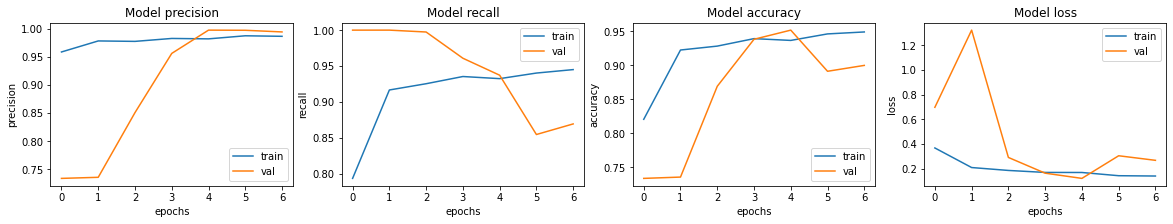

In [43]:
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(history_bs.history[met])
    ax[i].plot(history_bs.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [44]:
loss, accuracy, precision, recall = model_bs.evaluate(test_ds)
print(f'Loss: {loss},\nAccuracy: {accuracy},\nPrecision: {precision},\nRecall: {recall}')

39/39 [==============================] - 6s 141ms/step - loss: 0.4674 - accuracy: 0.8413 - precision: 0.8540 - recall: 0.9000
Loss: 0.467395544052124,
Accuracy: 0.8413461446762085,
Precision: 0.8540145754814148,
Recall: 0.8999999761581421


##### 2) baseline + augumentation Í≤∞Í≥º ÏãúÍ∞ÅÌôî + test

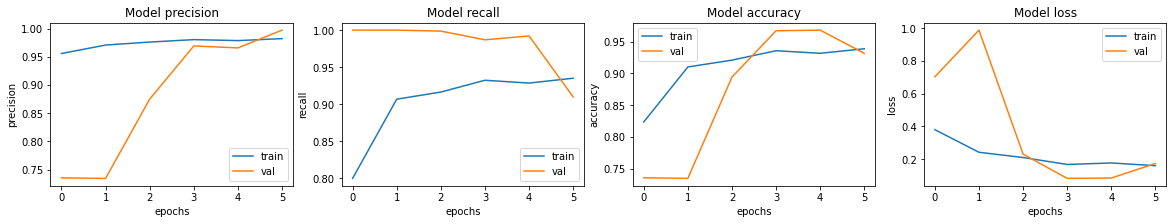

In [45]:
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(history_ba.history[met])
    ax[i].plot(history_ba.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [46]:
loss, accuracy, precision, recall = model_ba.evaluate(test_ds)
print(f'Loss: {loss},\nAccuracy: {accuracy},\nPrecision: {precision},\nRecall: {recall}')

39/39 [==============================] - 6s 141ms/step - loss: 0.3272 - accuracy: 0.8862 - precision: 0.8771 - recall: 0.9513
Loss: 0.32719138264656067,
Accuracy: 0.8862179517745972,
Precision: 0.8770685791969299,
Recall: 0.9512820243835449


##### 3) baseline + augumentation + dropout Îßå Ï†ÅÏö©Ìïú Dense_block_dp() Í≤∞Í≥º ÏãúÍ∞ÅÌôî + test

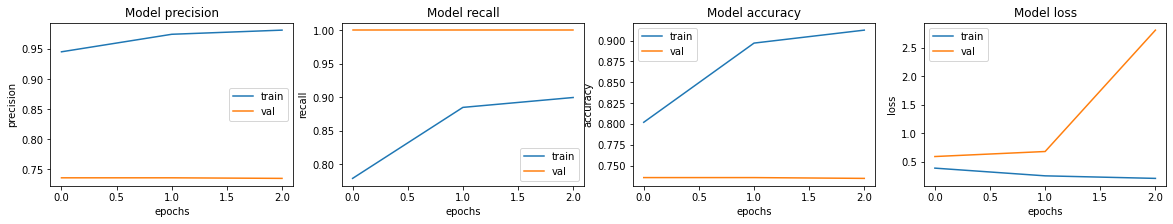

In [47]:
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(history_dp.history[met])
    ax[i].plot(history_dp.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [48]:
loss, accuracy, precision, recall = model_dp.evaluate(test_ds)
print(f'Loss: {loss},\nAccuracy: {accuracy},\nPrecision: {precision},\nRecall: {recall}')

39/39 [==============================] - 6s 142ms/step - loss: 5.7315 - accuracy: 0.6250 - precision: 0.6250 - recall: 1.0000
Loss: 5.731468200683594,
Accuracy: 0.625,
Precision: 0.625,
Recall: 1.0


#### 4) baseline + augumentation + BN Îßå Ï†ÅÏö©Ìïú  Dense Block_bn () Í≤∞Í≥º ÏãúÍ∞ÅÌôî + test

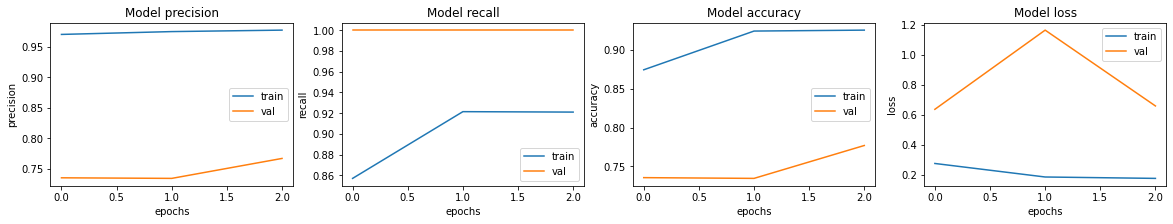

In [49]:
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(history_bn.history[met])
    ax[i].plot(history_bn.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [50]:
loss, accuracy, precision, recall = model_bn.evaluate(test_ds)
print(f'Loss: {loss},\nAccuracy: {accuracy},\nPrecision: {precision},\nRecall: {recall}')

39/39 [==============================] - 6s 141ms/step - loss: 1.5760 - accuracy: 0.6266 - precision: 0.6260 - recall: 1.0000
Loss: 1.5760153532028198,
Accuracy: 0.6266025900840759,
Precision: 0.6260032057762146,
Recall: 1.0


##### 5) regulization.l2 Í≤∞Í≥º ÏãúÍ∞ÅÌôî + test

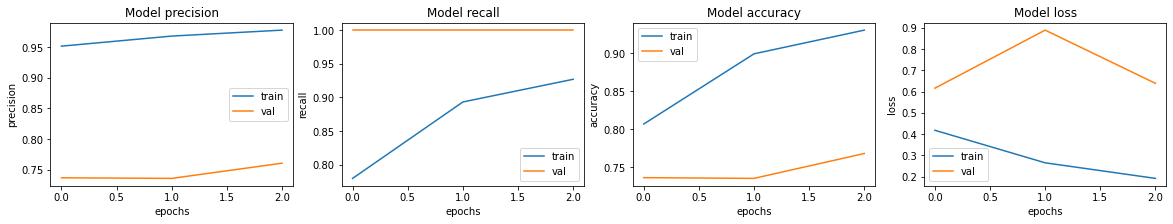

In [51]:
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(history_r.history[met])
    ax[i].plot(history_r.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [52]:
loss, accuracy, precision, recall = model_r.evaluate(test_ds)
print(f'Loss: {loss},\nAccuracy: {accuracy},\nPrecision: {precision},\nRecall: {recall}')

39/39 [==============================] - 6s 142ms/step - loss: 1.3109 - accuracy: 0.6250 - precision: 0.6250 - recall: 1.0000
Loss: 1.3108996152877808,
Accuracy: 0.625,
Precision: 0.625,
Recall: 1.0


### 8. ÌÖåÏä§Ìä∏ Í≤∞Í≥º  
- baseline + augumentation Î™®Îç∏Ïù¥ 88% Ï†ïÌôïÎèÑÎ°ú Í∞ÄÏû• ÏÑ±Îä•Ïù¥ Ï¢ãÏùå  
  dropout, BN, regulization.l2 Ï†ïÌôïÎèÑÎ•º Î≥¥Î©¥ train,valÍ∞Ä Ïò§Î≤ÑÌîºÌåÖÏù¥ ÎêòÎäî Í≤É Í∞ôÏïÑ Î≥¥ÏûÑ

### ÌöåÍ≥†



#### üíöÎ£®Î∏åÎ¶≠  
1. ÏùòÎ£åÏòÅÏÉÅÏùÑ Ï≤òÎ¶¨ÌïòÎäî CNN Í∏∞Î∞ò Îî•Îü¨Îãù Î™®Îç∏Ïù¥ Ïûò Íµ¨ÌòÑÎêòÏóàÎã§.  
- Î™®Îç∏ ÌïôÏäµÏù¥ ÏïàÏ†ïÏ†ÅÏúºÎ°ú ÏàòÎ†¥ÌïòÎäî Í≤ÉÏùÑ ÏãúÍ∞ÅÌôîÎ°ú ÌôïÏù∏Ìï®  

2. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ, Î™®Îç∏Íµ¨ÏÑ± Îì±Ïùò Í≥ºÏ†ïÏùò Îã§ÏñëÌïú Ïã§ÌóòÏù¥ Ï≤¥Í≥ÑÏ†ÅÏúºÎ°ú ÏàòÌñâÎêòÏóàÎã§.  
- regularization, augmentation Îì±Ïùò Í∏∞Î≤ïÏùò ÏÇ¨Ïö© Ïó¨Î∂ÄÏóê Îî∞Î•∏  
  Î™®Îç∏ ÏÑ±Îä• Ï∏°Ï†ïÏù¥ ablation study ÌòïÌÉúÎ°ú Ï≤¥Í≥ÑÏ†ÅÏúºÎ°ú ÏàòÌñâÎê®  
  
3. Ïã§ÏäµÏΩîÎìúÎ•º Ïûò Í∞úÏÑ†ÌïòÏó¨ ÌèêÎ†¥ Í≤ÄÏ∂ú Ï†ïÌôïÎèÑÍ∞Ä Ï∂îÍ∞ÄÎ°ú Ìñ•ÏÉÅÎêòÏóàÎã§  
- Accuracy Í∏∞Ï§Ä 85% Ïù¥ÏÉÅÏúºÎ°ú ÎèÑÎã¨Ìï®  

#### üíöÎ∞∞Ïö¥Ï†ê  
- Ïù¥Î≤à ÌîÑÎ°úÏ†ùÌä∏Î°ú dropout, BN, regulization.l2 Îì±  
  ÏõêÌïòÎäîÎåÄÎ°ú Î†àÏù¥Ïñ¥Î•º ÏåìÏùÑ Ïàò ÏûàÏñ¥ÏÑú Ïû¨Î∞åÏóàÎã§  